In [1]:
import os
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import seaborn as sns


In [2]:
os.getcwd()

'C:\\Users\\jwats\\Documents\\CodeandData\\Jupyter Notebooks'

### Loading and Cleaning DataFrame

In [3]:
df=pd.read_csv('exp_results/GROUP4-FINAL exp3-table.csv',skiprows=6).rename(columns={})
df=df.copy().rename(columns={ 'japanese-resupply-rate':'j-resupp',
                             'japanese_supplies':'j-supp', 
                             'britain-casualties-hunger':'b-hung',
                             'britain-casualties-combat':'b-comb',
                             'japan-casualties-hunger':'j-hung',
                             'japan-casualties-combat':'j-comb', 
                             'control-imphal':'imp',
                             'control-kohima':'koh'})
df1=df[['ticks','j-supp','b-hung','b-comb','j-hung','j-comb', 'imp', 'koh']].copy()

In [4]:
df1=df[['ticks','j-supp','j-resupp','b-hung','b-comb','j-hung','j-comb', 'imp', 'koh']].copy()
df1.loc[df1['imp']=='Britain','imp']=0.0
df1.loc[df1['imp']=='Japan','imp']=1.0
df1.loc[df1['koh']=='Britain','koh']=0.0
df1.loc[df1['koh']=='Japan','koh']=1.0
df1['koh']=df1['koh'].astype(int)
df1['imp']=df1['imp'].astype(int)
df1['j-tot']=df1['j-comb']+df1['j-hung']
df1['b-tot']=df1['b-comb']+df1['b-hung']
df1['j-per']=df1['j-comb']/df1['j-tot']
df1['b-per']=df1['b-comb']/df1['b-tot']

In [5]:
df1

,ticks,j-supp,j-resupp,b-hung,b-comb,j-hung,j-comb,imp,koh,j-tot,b-tot,j-per,b-per
0,43,0,0,0,3184,26288,1088,0,0,27376,3184,0.039743,1.0
1,44,1,0,0,4030,26379,769,0,0,27148,4030,0.028326,1.0
2,43,0,0,0,3199,26315,1019,0,0,27334,3199,0.037280,1.0
3,51,0,0,0,3464,30234,1223,0,0,31457,3464,0.038878,1.0
4,51,1,0,0,3717,29648,1336,0,0,30984,3717,0.043119,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11105,247,100,10,0,117384,0,73747,1,1,73747,117384,1.000000,1.0
11106,250,100,10,0,116982,0,76014,1,1,76014,116982,1.000000,1.0
11107,254,100,10,0,116035,0,76576,1,1,76576,116035,1.000000,1.0
11108,262,100,10,0,116767,0,76421,1,1,76421,116767,1.000000,1.0


In [6]:
exp3a=df1.groupby('j-supp',as_index=False).agg({'j-tot' : 'mean', 
                                               'b-tot' : 'mean',
                                               'imp':'sum',
                                               'koh':'sum',
                                               'ticks':'mean',
                                               'j-per':'mean',
                                               'b-per':'mean'})

In [7]:
exp3b=df1.groupby('j-resupp',as_index=False).agg({'j-tot' : 'mean', 
                                               'b-tot' : 'mean',
                                               'imp':'sum',
                                               'koh':'sum',
                                               'ticks':'mean',
                                               'j-per':'mean',
                                               'b-per':'mean'})

### Summary Stats and Regression Analysis (for tables)

In [8]:
nump_var=df1[['j-supp','j-resupp']].to_numpy()

In [9]:
### Regression 1: casualties vs supplies
import statsmodels.api as sm

#define response variable
y = df1['j-tot']

#define predictor variables
x = nump_var

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.params[1], model.params[2])
print(model.bse[1],model.bse[2])
print(model.fvalue)
print(model.pvalues[1],model.pvalues[2])
print(model.rsquared)

164.13591369725242 1527.9070657064274
2.6689783793392774 24.60676482387216
3818.7491840736566
0.0 0.0
0.40745280125104755


In [10]:
### Regression 2: days vs supplies
import statsmodels.api as sm

#define response variable
y = df1['ticks']

#define predictor variables
x = nump_var

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.params[1], model.params[2])
print(model.bse[1],model.bse[2])
print(model.fvalue)
print(model.pvalues[1],model.pvalues[2])
print(model.rsquared)

1.0916174087997041 12.393348334833096
0.010540546212075154 0.09717903440637772
13494.804164283458
0.0 0.0
0.7084517365901215


In [11]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  ticks   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                 1.349e+04
Date:                Sun, 23 Apr 2023   Prob (F-statistic):               0.00
Time:                        11:56:08   Log-Likelihood:                -54402.
No. Observations:               11110   AIC:                         1.088e+05
Df Residuals:                   11107   BIC:                         1.088e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         95.1368      0.780    121.981      0.0

In [12]:
### Regression 4: capturing imphal vs supplies
import statsmodels.api as sm

#define response variable
y = df1['koh']

#define predictor variables
x = nump_var

#add constant to predictor variables
x = sm.add_constant(x)

#fit Logit regression model
model = sm.Logit(y, x).fit()

#view model summary
print(model.summary())
print(model.summary2())

Optimization terminated successfully.
         Current function value: 0.087084
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                    koh   No. Observations:                11110
Model:                          Logit   Df Residuals:                    11107
Method:                           MLE   Df Model:                            2
Date:                Sun, 23 Apr 2023   Pseudo R-squ.:                  0.8743
Time:                        11:56:08   Log-Likelihood:                -967.51
converged:                       True   LL-Null:                       -7696.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -29.0714      0.941    -30.901      0.000     -30.915     -27.227
x1             0.2495      0

In [13]:
import statsmodels.api as sm

#define response variable
y = df1['imp']

#define predictor variables
x = nump_var
#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.Logit(y, x).fit()

#view model summary
print(model.summary())
print(model.summary2())

Optimization terminated successfully.
         Current function value: 0.096020
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                    imp   No. Observations:                11110
Model:                          Logit   Df Residuals:                    11107
Method:                           MLE   Df Model:                            2
Date:                Sun, 23 Apr 2023   Pseudo R-squ.:                  0.8361
Time:                        11:56:08   Log-Likelihood:                -1066.8
converged:                       True   LL-Null:                       -6508.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -30.7016      0.965    -31.828      0.000     -32.592     -28.811
x1             0.1542      0

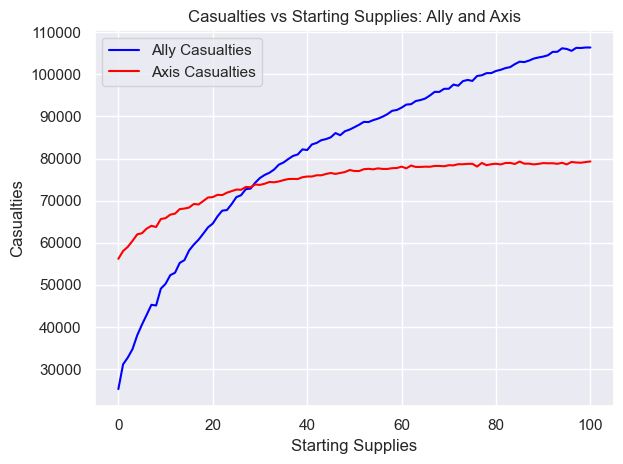

In [14]:
sns.set_theme()

plt.plot(exp3a['j-supp'], exp3a['b-tot'],color='blue',label='Ally Casualties', zorder=1)
plt.plot(exp3a['j-supp'], exp3a['j-tot'],color='red',label='Axis Casualties', zorder=1)

plt.title('Casualties vs Starting Supplies: Ally and Axis')
plt.xlabel('Starting Supplies')
plt.ylabel('Casualties')
plt.legend()
plt.tight_layout()
plt.savefig('images/exp3a1.png',dpi=500)
plt.show()

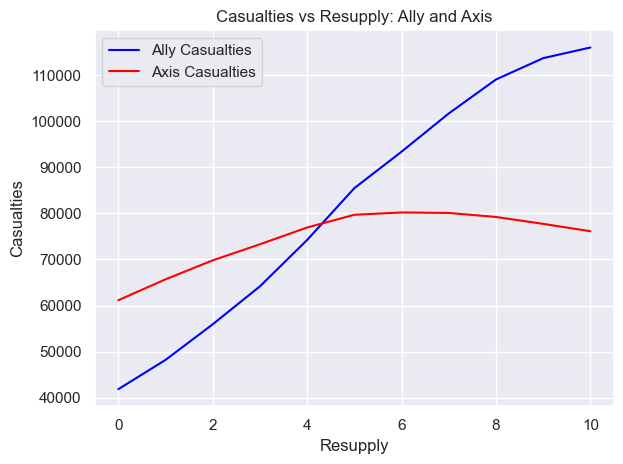

In [15]:
sns.set_theme()

plt.plot(exp3b['j-resupp'], exp3b['b-tot'],color='blue',label='Ally Casualties', zorder=1)
plt.plot(exp3b['j-resupp'], exp3b['j-tot'],color='red',label='Axis Casualties', zorder=1)

plt.title('Casualties vs Resupply: Ally and Axis')
plt.xlabel('Resupply')
plt.ylabel('Casualties')
plt.legend()
plt.tight_layout()
plt.savefig('images/exp3a2.png',dpi=500)
plt.show()

### Data Visualizations: Scatter plots